Мы будем анализировать результаты автомобильных гонок.

Для начала подключим Google Colab к
Google Drive, чтобы считать данные из файла. А затем подключим необходимые библиотеки для анализа и визуализации данных.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Считаем данные из таблицы с информацией о гонках, проведённых в период с 2001 по 2025 год.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Python/Formula2_Race_Results.csv")
df = df[df["Date"] < "2025"]

Визуализируем данные.

На первой диаграмме представлена зависимость количества кругов от позиции команды. Можно видеть, что большинству участников удалось совершить 20 кругов и в целом результаты разнятся мало.

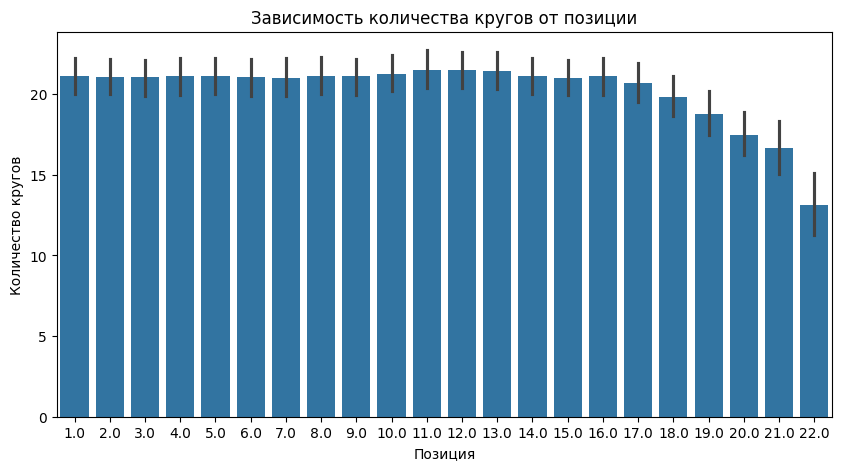

In [4]:

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Position', y = 'Laps', data = df)
plt.title('Зависимость количества кругов от позиции')
plt.xlabel('Позиция')
plt.ylabel('Количество кругов')
plt.show()

На следующем графике изображена средняя скорость команды по трассам, пройденным за весь период с 2001 по 2025 год. Можно видеть, что она приблизительно одинакова для всех команд и колеблется около отметки в 150-175 км/час.

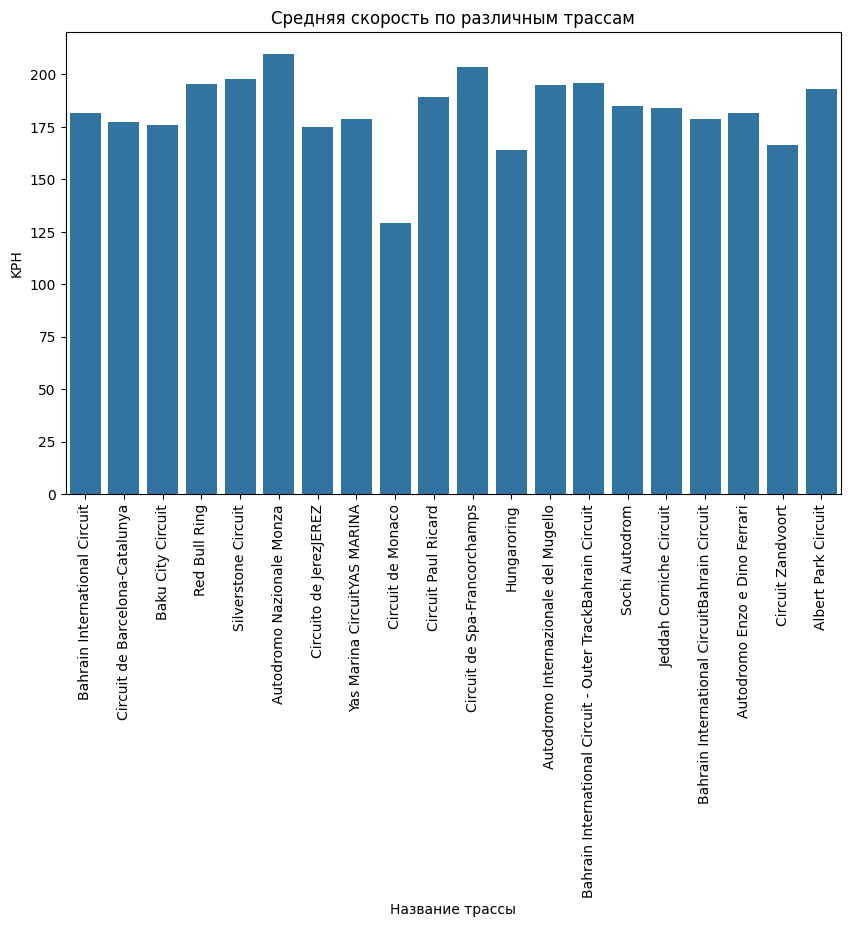

In [5]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Track Name', y = 'KPH', data = df, errorbar = None)
plt.xticks(rotation = 90)
plt.title('Средняя скорость по различным трассам')
plt.xlabel('Название трассы')
plt.ylabel('KPH')
plt.show()

Следующая диаграмма иллюстрирует зависимость результата команды, первой завершившей прохождение трассы, от длины трассы.

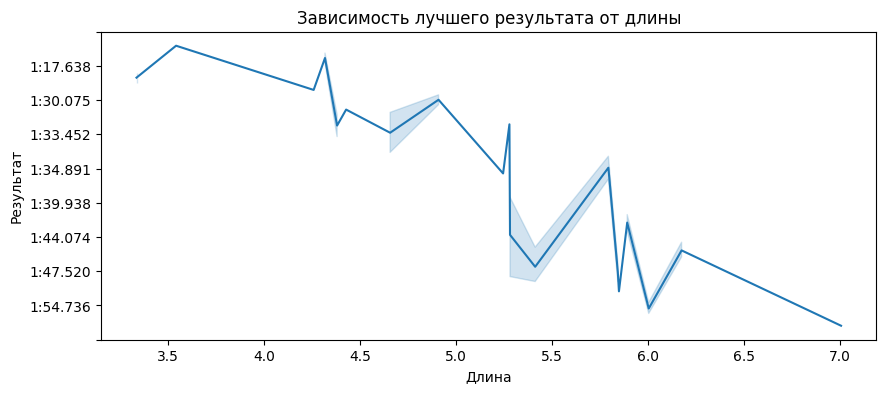

In [6]:
new = df[df["Position"] == 1.0]
new = new.sort_values(by = "Best Lap Time")
new = new[new['Race Type'] == 'Sprint Race Results']
plt.figure(figsize = (10, 4))
sns.lineplot(x = "Length (Km)", y = "Best Lap Time", data = new)
plt.title("Зависимость лучшего результата от длины")
plt.xlabel("Длина")
plt.ylabel("Результат")
n = 10 # Просто напишите, сколько нужно значений по оси Y

y_min, y_max = plt.gca().get_ylim()  # Получаем текущие границы оси Y
yticks = np.linspace(y_min, y_max, n)  # Создаем n значений
plt.gca().set_yticks(yticks)  # Устанавливаем деления
plt.show()

Следующая круговая диаграмма содержит информацию только про пять команд. Эта диаграмма показывает, какая доля участников из этих команд была в пятерке лучших на соревновании. Очевидным образом, лидирует команда Art Grand Prix.

Text(0.5, 1.0, 'Соотношения количества участников, попавших в топ 5, среди первых 5 команд в алфавитном порядке')

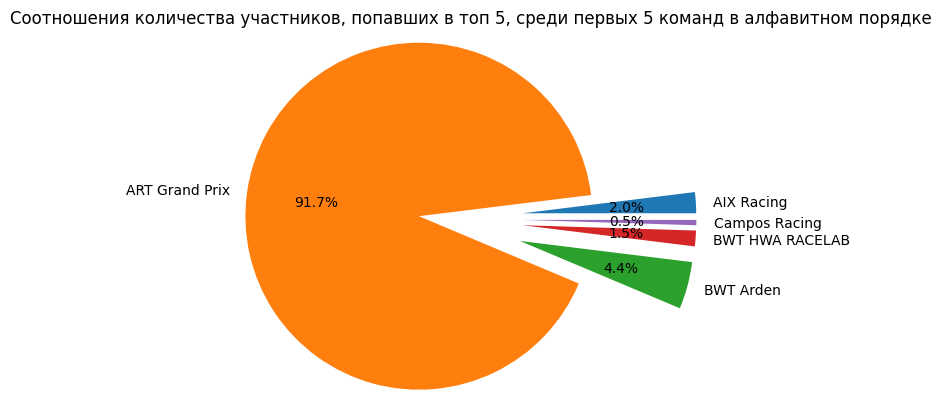

In [7]:
best_comands = df[df["Position"] <= 5.0]
best_comands = best_comands.sort_values(by = "Team Name")
con = [0]
count = 0
answer = {}
for i in best_comands['Team Name']:
  if con[0] != i:
    con[0] = i
    count += 1
    answer[i] = 1
    if count == 5:
      break
  else:
    answer[i] += 1
values = list(answer.values())
labels = list(answer.keys())
explode = (0.5, 0.1, 0.5, 0.5, 0.5)
fig, ax = plt.subplots()
ax.pie(values, labels = labels, autopct='%1.1f%%', shadow = False, explode = explode)
ax.axis("equal")
plt.title("Соотношения количества участников, попавших в топ 5, среди первых 5 команд в алфавитном порядке")


### Теперь гипотезы


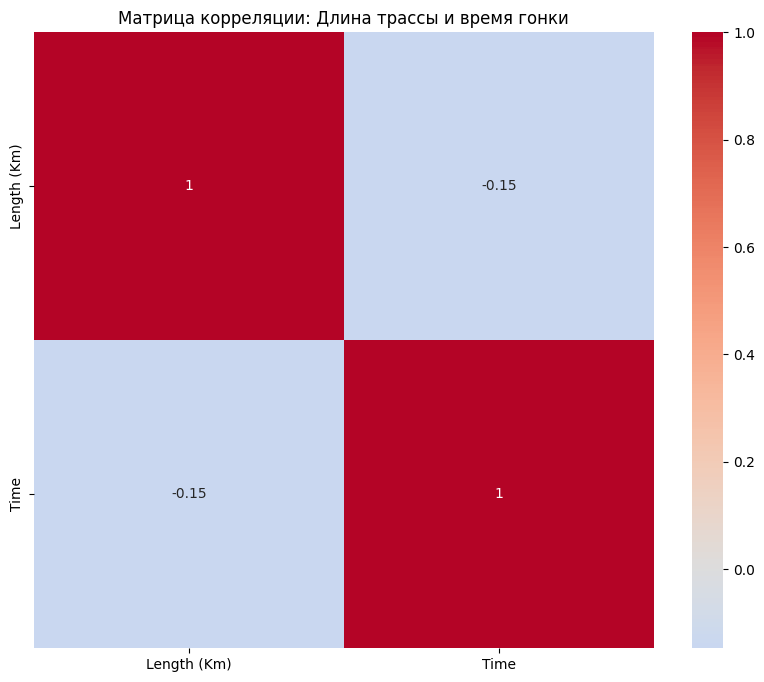

In [8]:
df_race = df[df['Race Type'].str.contains('Race Results')]

df_race.loc[:, 'Time'] = pd.to_timedelta(df_race['Time'], errors = 'coerce').dt.total_seconds()

correlation_matrix_2 = df_race[['Length (Km)', 'Time']].dropna().corr()

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix_2, annot = True, cmap = 'coolwarm', center = 0)
plt.title('Матрица корреляции: Длина трассы и время гонки')
plt.show()

Следующий график показывает, как связано время лучшего круга на тренировке и на соревновании. Гипотеза состоит в том, что, чем лучше время, показанное во время тренировки, тем лучше время, показанное во время спринтерской гонки.

<Figure size 2000x1000 with 0 Axes>

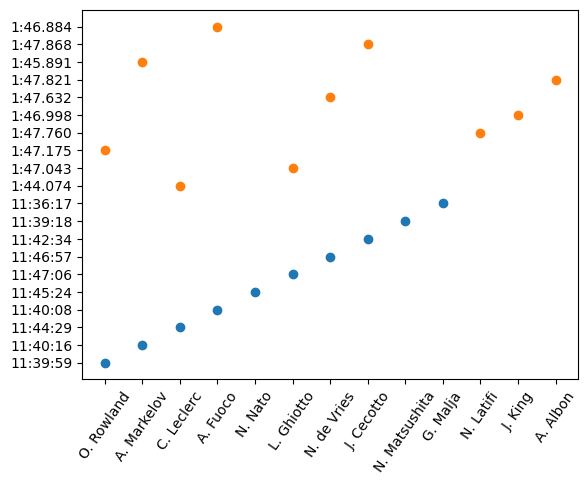

In [24]:
# лучшее время круга во время тренировки и во время спринтерской гонки
best_resolt_practice = df[df['Race Type'] == "Free Practice Results"].head(10)
best_resolt_sprint = df[df['Race Type'] == "Sprint Race Results"].head(10)

practice_Dr = best_resolt_practice["Driver Name"].tolist()
practice_Best = best_resolt_practice["Best Lap Time"].tolist()

sprint_Dr = best_resolt_sprint["Driver Name"].tolist()
sprint_Best = best_resolt_sprint["Best Lap Time"].tolist()

plt.figure(figsize=(20, 10))


fig, axes = plt.subplots()
plt.scatter(practice_Dr, practice_Best)
plt.scatter(sprint_Dr, sprint_Best)

plt.xticks(rotation=55)
plt.show()

По графику видно, что никакой явной корреляции между двумя показателями нет. Поэтому гипотеза не подтверждается.

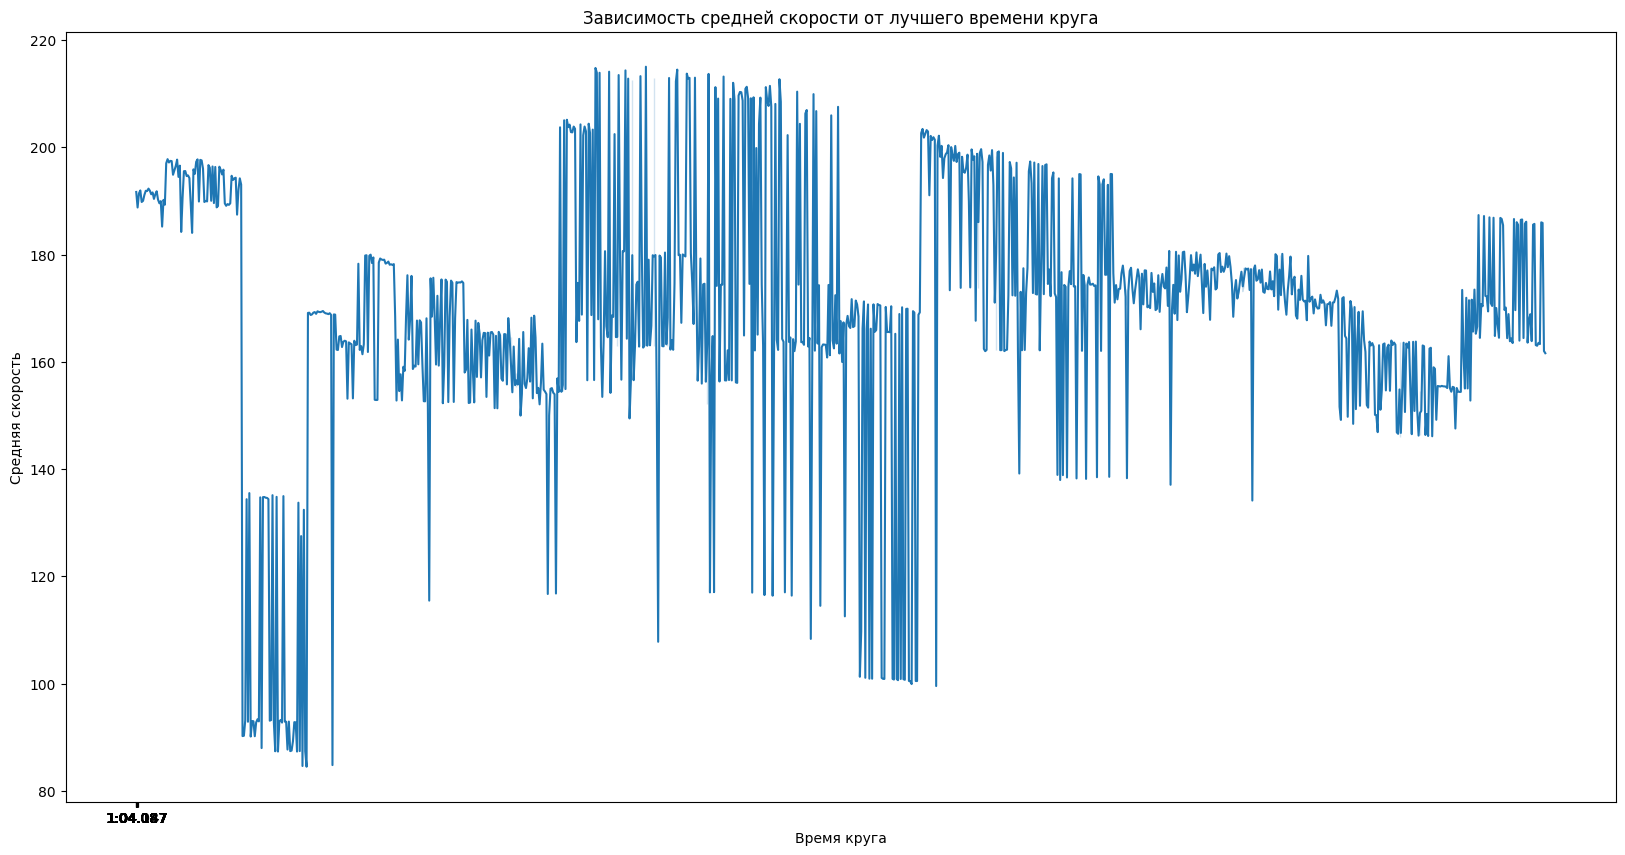

In [10]:
# чем меньше бест время, тем выше средняя скорость на футуре гонках
# resolt_feature = df[df['Race Type'] == "Feature Race Results"].head(10)
resolt_feature = df[df['Race Type'] == "Feature Race Results"]
resolt_feature = resolt_feature.sort_values(by = "Best Lap Time")
plt.figure(figsize = (20, 10))

n = 20

x_min, x_max = plt.gca().get_xlim()
xticks = np.linspace(x_min, x_max, n)
plt.gca().set_xticks(xticks)

sns.lineplot(x = "Best Lap Time", y = "KPH", data = resolt_feature)
plt.title("Зависимость средней скорости от лучшего времени круга")
plt.xlabel("Время круга")
plt.ylabel("Средняя скорость")
plt.show()